In [1]:
import pandas as pd
import fbprophet
from sklearn.metrics import mean_squared_error,mean_absolute_error
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('final.csv')

In [3]:
df = df.rename({'Unnamed: 0':'year'},axis = 1)
year = []
for i in df.year:
     year.append(i.split(' ')[0])
df.year = year
df['year'] = pd.to_datetime(df['year'],dayfirst=True)

In [4]:
data = df[['year','GDP per capita (current US$)']]

In [5]:
data

,year,GDP per capita (current US$)
0,1960-01-01,82.188603
1,1961-01-01,85.354301
2,1962-01-01,89.881756
3,1963-01-01,101.126429
4,1964-01-01,115.537496
...,...,...
56,2016-01-01,1732.554242
57,2017-01-01,1980.667020
58,2018-01-01,1996.915087
59,2019-01-01,2100.751461


In [33]:
train = data[:55]

In [34]:
train.columns = ['ds','y']
data.columns = ['ds','y']

In [35]:
train

,ds,y
0,1960-01-01,82.188603
1,1961-01-01,85.354301
2,1962-01-01,89.881756
3,1963-01-01,101.126429
4,1964-01-01,115.537496
5,1965-01-01,119.318916
6,1966-01-01,89.997304
7,1967-01-01,96.339136
8,1968-01-01,99.875963
9,1969-01-01,107.622318


In [69]:
model = fbprophet.Prophet(daily_seasonality=False,weekly_seasonality=False,yearly_seasonality=False,seasonality_mode='multiplicative',mcmc_samples=5000)

In [70]:
model.fit(train)

In [71]:
model.component_modes

{'additive': ['additive_terms', 'extra_regressors_additive'],
 'multiplicative': ['multiplicative_terms',
  'extra_regressors_multiplicative',
  'holidays']}

In [72]:
future = model.make_future_dataframe(periods = 6,freq='Y')

In [73]:
pred = model.predict(future)

In [74]:
p = pred['yhat'][55:]

In [75]:
mean_squared_error(p,data['y'][55:]),mean_absolute_error(p,data['y'][55:])

(13126.643528251041, 94.90732055367835)

In [76]:
pred.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1960-01-01,71.122869,9.367262,133.408103,43.283880,98.809199,0.0,0.0,0.0,0.0,0.0,0.0,71.122869
1,1961-01-01,76.416446,14.068091,138.794072,52.013855,100.707470,0.0,0.0,0.0,0.0,0.0,0.0,76.416446
2,1962-01-01,81.695561,21.737586,140.761917,60.296813,103.069591,0.0,0.0,0.0,0.0,0.0,0.0,81.695561
3,1963-01-01,87.062263,27.895211,145.457112,67.907607,106.277856,0.0,0.0,0.0,0.0,0.0,0.0,87.062263
4,1964-01-01,92.512208,35.624808,152.520161,75.401878,109.657915,0.0,0.0,0.0,0.0,0.0,0.0,92.512208


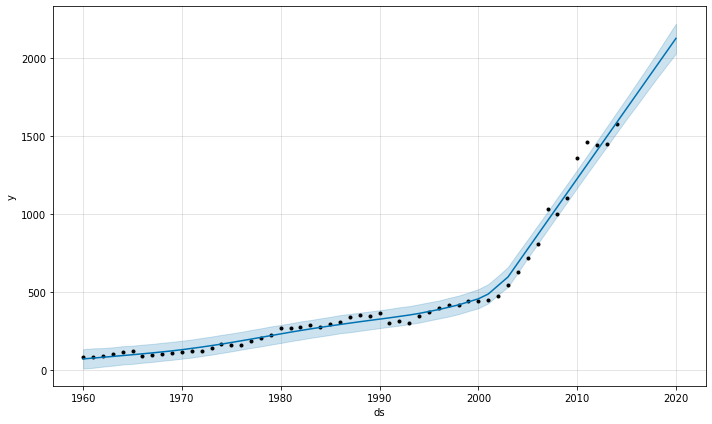

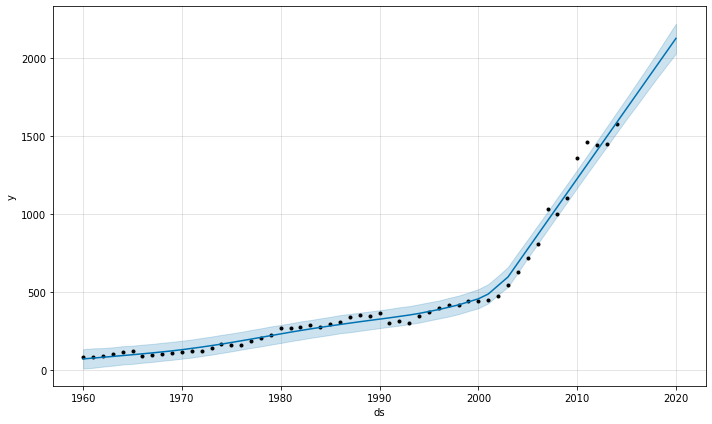

In [77]:
model.plot(pred)

In [78]:
test =data['y'][55:]

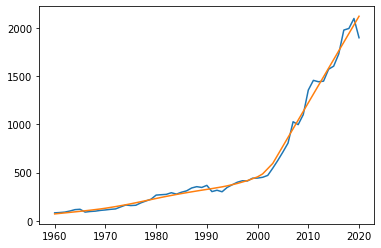

In [79]:
plt.plot(data['ds'],data['y'])
plt.plot(data['ds'],pred.yhat)